<a href="https://www.kaggle.com/code/aicortex/categorical-classification-tensorflow-vs-pythorch?scriptVersionId=262798605" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# import lib


In [5]:
import sys
from pathlib import Path
path = "/kaggle/input/categorical-classification-utility-script/src"
cfg_path = Path('/kaggle/input/categorical-classification-utility-script/config/config.yml')

if path not in sys.path:
    sys.path.append(path)
        
import utils
import generate_data
import TF_model
import Torch_model

cfg = utils.load_config(cfg_path)

# create data


(7000, 2) (7000, 1)
(1500, 2) (1500, 1)
(1500, 2) (1500, 1)


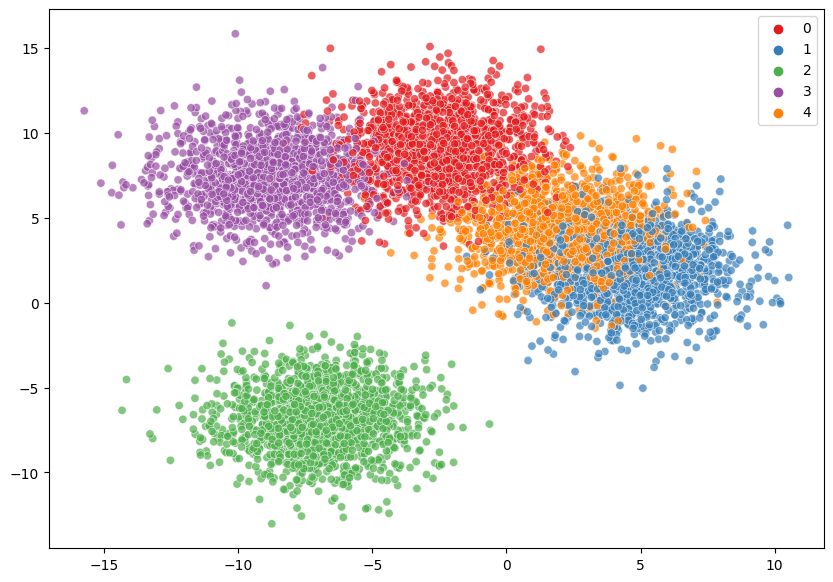

In [6]:
(
    X_train, 
    X_val, 
    X_test, 
    y_train,
    y_val, 
    y_test
) = generate_data.generate_data(cfg)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

utils.plot_data(X_train, y_train)

# Tensorflow model


In [8]:
tf_model = TF_model.TFModel(cfg)
tf_model.fit(x=X_train, 
             y=y_train,
             validation_data=(X_val, y_val), 
             batch_size=cfg['batch_size'],
             epochs=cfg['epochs'])



Epoch 1/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4173 - loss: 1.4201 - val_accuracy: 0.8560 - val_loss: 0.4382
Epoch 2/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8683 - loss: 0.3671 - val_accuracy: 0.8647 - val_loss: 0.3230
Epoch 3/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8784 - loss: 0.2969 - val_accuracy: 0.8653 - val_loss: 0.3040
Epoch 4/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8803 - loss: 0.2874 - val_accuracy: 0.8747 - val_loss: 0.2941
Epoch 5/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8877 - loss: 0.2716 - val_accuracy: 0.8800 - val_loss: 0.2853
Epoch 6/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8847 - loss: 0.2748 - val_accuracy: 0.8853 - val_loss: 0.2843
Epoch 7/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8926 - loss: 0.2600 - val_accuracy: 0.8773 - val_loss: 0.2841
Epoch 8/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9004 - loss: 0.2528 - val_accuracy: 0

# Torch Model


In [9]:
torch_model = Torch_model.TorchWrapper(cfg)
torch_model.fit(X_train, y_train, X_val, y_val)

epoch 001 : train loss -> 0.9695 || val loss -> 0.4563 || val accuracy -> %86.07
epoch 002 : train loss -> 0.3427 || val loss -> 0.3069 || val accuracy -> %86.87
epoch 003 : train loss -> 0.2880 || val loss -> 0.2904 || val accuracy -> %86.93
epoch 004 : train loss -> 0.2751 || val loss -> 0.2818 || val accuracy -> %87.13
epoch 005 : train loss -> 0.2671 || val loss -> 0.2757 || val accuracy -> %87.47
epoch 006 : train loss -> 0.2617 || val loss -> 0.2713 || val accuracy -> %87.67
epoch 007 : train loss -> 0.2579 || val loss -> 0.2678 || val accuracy -> %88.20
epoch 008 : train loss -> 0.2554 || val loss -> 0.2651 || val accuracy -> %88.40
epoch 009 : train loss -> 0.2534 || val loss -> 0.2629 || val accuracy -> %88.60
epoch 010 : train loss -> 0.2519 || val loss -> 0.2611 || val accuracy -> %88.73
epoch 011 : train loss -> 0.2509 || val loss -> 0.2598 || val accuracy -> %88.93
epoch 012 : train loss -> 0.2501 || val loss -> 0.2588 || val accuracy -> %88.93
epoch 013 : train loss -> 0.

# Tensorflow vs Torch


In [12]:
tf_result = tf_model.my_evaluate(X_test, y_test)
torch_result = torch_model.my_evaluate(X_test, y_test)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [13]:
tf_result['accuracy_score'], torch_result['accuracy_score']

(0.8906666666666667, 0.8866666666666667)

In [14]:
print('tensorflow classification report')
print(tf_result['classification_report'])
print('-------------------------------------------')
print('torch classification report')
print(torch_result['classification_report'])

tensorflow classification report
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       288
           1       0.84      0.82      0.83       298
           2       1.00      1.00      1.00       305
           3       0.94      0.96      0.95       316
           4       0.77      0.78      0.78       293

    accuracy                           0.89      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.89      0.89      0.89      1500

-------------------------------------------
torch classification report
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       288
           1       0.84      0.80      0.82       298
           2       1.00      1.00      1.00       305
           3       0.96      0.95      0.95       316
           4       0.76      0.76      0.76       293

    accuracy                           0.89      1500
   macro avg       0.88   

In [15]:
print('tensorflow confusion matrix')
print(tf_result['confusion_matrix'])
print('-------------------------------------------')
print('torch confusion matrix')
print(torch_result['confusion_matrix'])

tensorflow confusion matrix
[[254   0   0  20  14]
 [  0 243   0   0  55]
 [  0   0 305   0   0]
 [ 12   0   0 304   0]
 [ 17  46   0   0 230]]
-------------------------------------------
torch confusion matrix
[[266   0   0  12  10]
 [  0 237   0   0  61]
 [  0   0 305   0   0]
 [ 17   0   0 299   0]
 [ 26  44   0   0 223]]
